In [1]:
# Plot the data
import matplotlib.pyplot as plt
import numpy as np
from stateprep_qet.utils import (
    amp_to_prob,
    find_angle,
    h,
    h_hat,
    normalize,
)

NUM_QUBITS = 4  # resolution of input x
EXP_RATE = 1  # decay rate of the Gaussian

F = lambda x: np.exp(-EXP_RATE * (x**2))  # Gaussian
MIN = -2  # min x
MAX = 2  # max x

In [2]:
a3_qsvt_odd = [[(-1.284189387116004e-14-0.12499999999999985j)], [(-0.007795959926041154+0.004184798529707872j)], [(0.0009478830199425685+0.12151562324264216j)], [(0.02274099759100722-0.01235327062747036j)], [(-0.0007557489663462274-0.1239618146000248j)], [(-0.03153695841968554-0.027267879071957043j)], [(-0.005099708934618527+0.03615327169108031j)], [(0.017230064363639205-0.037465683021273136j)], [(-0.0008572855341090282-0.06087429880627999j)], [(0.01615316200166566-0.03693000230335928j)], [(0.03668935468311388-0.09513785454816392j)], [(-0.03271946785207518-0.11386348627969049j)], [(-0.07127513780998264+0.005810552344733772j)], [(0.03670203752711688+0.05750450996864248j)], [(0.08624619484052383-0.04418586613283227j)], [(-0.047038831355597326-0.07003941530157867j)]]
a3_qsvt_even = [[(0.12491589190872725-0.004584751754145938j)], [(-0.012284134810483547-0.006635750095070401j)], [(-0.12213555159163163-0.013408979240635752j)], [(0.030146261305194395-0.026266989684922214j)], [(0.11185578288429619-0.04600049031002176j)], [(-0.025971241795187533-0.07121405023053204j)], [(-0.07696723429311744-0.09733802589711067j)], [(0.004600726302516783-0.11742098706570765j)], [(6.228900621531957e-05-0.12498835452197626j)], [(-0.009171249774135424-0.11740866058588469j)], [(0.07497481455521147-0.09734179860128582j)], [(0.03566567237375983-0.07122148388555856j)], [(-0.10851618489160113-0.04597688492072141j)], [(-0.03961821043593226-0.026194308929875662j)], [(0.12036110412261862-0.013178638690833556j)], [(0.018140599404447153-0.0058484425991347485j)]]
a3_qsvt_odd = [x[0] for x in a3_qsvt_odd]
a3_qsvt_even = [x[0] for x in a3_qsvt_even]

1.0


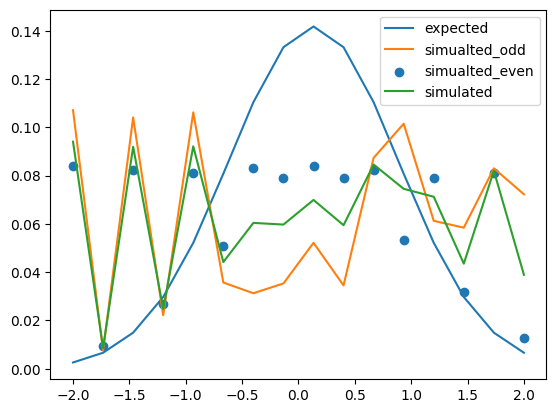

simulated prob: [0.09405 0.00858 0.09194 0.02478 0.09213 0.0442  0.06042 0.05972 0.06992
 0.05947 0.08458 0.07453 0.07124 0.04353 0.082   0.03891]
expected prob: [0.0026  0.00663 0.01494 0.02972 0.05215 0.08078 0.11041 0.13318 0.14177
 0.13318 0.11041 0.08078 0.05215 0.02972 0.01494 0.00663]


In [15]:
x = np.linspace(MIN, MAX, 2**NUM_QUBITS)
# simulated = [0.09472487962367022, 0.0005494248011740668, 0.0904938054334136, 0.005269005954149731, 0.10582301192061445, 0.03531685492508079, 0.06533057372402222, 0.09197744787147595, 0.1169733294799882, 0.0917191321874338, 0.11213216770708226, 0.10917571494171097, 0.013155467330462939, 0.024306277917593603, 0.013025126871953702, 0.030027779310164076]
# simulated = [0.0002547665690941403, 0.0005336921707615068, 0.0021792257637536882, 0.008362408809949443, 0.0256469490701196, 0.06146702035050962, 0.11483541813423556, 0.1671099239261562, 0.18934327689631375, 0.16707484043661586, 0.11484432007059955, 0.06147985344934408, 0.02562063409482208, 0.008316195268052783, 0.0021049989845658423, 0.00041456368058148625]
simulated = normalize([np.abs(even)+np.abs(odd) for even, odd in zip(a3_qsvt_even, a3_qsvt_odd)])
print(np.sum(simulated))
expected = normalize(
    [
        (F(((MAX - MIN) * x / 2**NUM_QUBITS) + MIN))
        for x in range(2**NUM_QUBITS)
    ]
)
plt.plot(x, expected, label="expected")
plt.plot(x, normalize(np.abs(a3_qsvt_odd)), label="simualted_odd")
plt.scatter(x, normalize(np.abs(a3_qsvt_even)), label="simualted_even")
plt.plot(x, simulated, label="simulated")
plt.legend()
plt.show()

print("simulated prob:", np.round(simulated, 5))
print("expected prob:", np.round(expected, 5))

# # assert the probabilities sum to 1
# assert np.allclose(np.sum(simulated), 1)
# assert np.allclose(np.sum(expected), 1)

# # assert the probabilities are close to the ground truth
# assert np.allclose(simulated, expected, atol=1e-2)
# print("PASSED")